# Stage3 深層学習day2
## 深層学習day2

##  １、Section1：勾配消失問題
###  &emsp;&emsp; 1.1　要点まとめ
###   &emsp;&emsp; 1.1.1 誤差逆伝搬法の復習
####  &emsp;&emsp; &emsp; &emsp; 最小限の計算で各パラメータでの微分値を解析的に計算する手法。微分の連鎖律を使って計算を効率化する。
####  &emsp;&emsp; &emsp; &emsp;【誤差逆伝播法】
####  &emsp;&emsp; &emsp; &emsp; 算出された誤差を、出力層側から順に微分し前の層前の層へと伝播。
####  &emsp;&emsp; &emsp; &emsp; 最小限の計算で各パラメータでの微分値を解析的に計算する手法
####  &emsp;&emsp; &emsp; &emsp;それぞれの場所で起こるズレ（誤差）を重みの変更量を再利用する。
####  &emsp;&emsp; &emsp; &emsp;計算結果（=誤差）から微分を逆算することで、不要な再帰的計算を避けて微分を算出できる

#### &emsp;&emsp;&emsp;変数x -> z -> y -> Eで　
#### &emsp;&emsp;&emsp; $ \frac{\partial E }{\partial x}$を求めたい場合
#### &emsp;&emsp;&emsp;微分の連鎖律から以下のように表すことが出来、
#####  &emsp;&emsp; &emsp; &emsp;$ \frac{\partial E }{\partial x}$ = $ \frac{\partial E }{\partial y}$ $ \frac{\partial y }{\partial z}$ $ \frac{\partial z }{\partial x} $ 
#####  &emsp;&emsp; &emsp; &emsp;$ \frac{\partial E }{\partial y}$ , $ \frac{\partial y }{\partial z}$ ,$ \frac{\partial z }{\partial x}  $ を求めることで計算処理を減らすことが可能。
####   
### &emsp;&emsp;1.1.2 勾配消失問題とは
#### &emsp;&emsp;&emsp;&emsp; 誤差逆伝播法は、各層の微分を求めて各層のw,bを算出する方法ですが、 ニューラルネットワークの層が深くなると,微分計算の回数が増加し
#### &emsp;&emsp;&emsp;&emsp; 勾配が下層（入力層）に近づくのにつれて緩やかになるため、パラメータが収束しなくなる現象。
### &emsp;&emsp;&emsp;&emsp; 対処する方法は以下の通り
#### &emsp;&emsp;&emsp;&emsp; &emsp;&emsp; ・　活性化関数の選択
#### &emsp;&emsp;&emsp;&emsp; &emsp;&emsp; ・　重みの初期値設定
#### &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;  ・　バッチ正規化
#### &emsp;&emsp;&emsp;&emsp; 対処方法を順に説明する。
### &emsp;&emsp;1.1.2.1　活性化関数の選択
#### &emsp;&emsp;&emsp;&emsp; 活性化関数でよく使われるシグモイド関数は微分した際に最大値が0.25であり、繰り返し積を
#### &emsp;&emsp;&emsp;&emsp; することで勾配消失問題を引き起こしやすい。(図1-1参照）
#### &emsp;&emsp;&emsp;&emsp; 勾配消失問題を引き起こさせないためには、微分しても値が減らない活性化関数が望ましく
#### &emsp;&emsp;&emsp;&emsp; Relu関数(図1-2参照）が中間層の活性化関数として用いられるようになってきている。

#### &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;&emsp;&emsp;&emsp; &emsp;&emsp;  図1-1 活性化関数: シグモイド関数

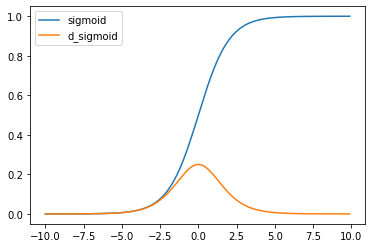

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import math


# シグモイド関数
# y = 1 / (1 * + e^(-x))
def sigmoid(a):
    s = 1 / (1 + e**-a)
    return s


# シグモイド関数の微分
# dy_sig = sigmoid(x) * (1 - sigmoid(x))
def d_sigmoid(a):
    s = sigmoid(a) * (1 - sigmoid(a))
    return s


e = math.e
dx = 0.1

x = np.arange(-10, 10, dx)

y_sig = sigmoid(x)
dy_sig = d_sigmoid(x)

plt.plot(x, y_sig, label="sigmoid")
plt.plot(x, dy_sig, label="d_sigmoid")
plt.legend()
plt.show()

#### &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;&emsp;&emsp;&emsp; &emsp;&emsp;  図1-2 活性化関数: Relu関数

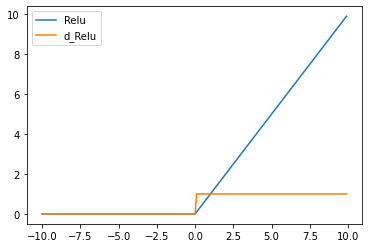

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import math


# Relu関数
# 
def relu(x):
    return x*(x>=0)


# Relu関数の微分
# 
def derivative_relu(x):
    return 1*(x>=0)
 

e = math.e
dx = 0.1

x = np.arange(-10, 10, dx)

y_relu = relu(x)
dy_relu = derivative_relu(x)

plt.plot(x, y_relu, label="Relu")
plt.plot(x, dy_relu, label="d_Relu")
plt.legend()
plt.show()

### &emsp;&emsp;1.1.2.2　重みの初期値設定
#### &emsp;&emsp;&emsp;&emsp; Xavier：重みの要素を、前の層のノード数の平方根で除算した値
#### &emsp;&emsp;&emsp;&emsp; He&emsp;&emsp; ：重みの要素を、前の層のノード数の平方根で除算した値に対し√２をかけ合わせた値
#### &emsp;&emsp;&emsp;&emsp; Xavierの初期値を設定する際の活性化関数
#### &emsp;&emsp;&emsp;&emsp; Heの初期値を設定する際の活性化関数
#### &emsp;&emsp;&emsp;&emsp; 勾配消失問題を引き起こさせないためには、微分しても値が減らない活性化関数が望ましく
#### &emsp;&emsp;&emsp;&emsp; Relu関数(図1-2参照）が中間層の活性化関数として用いられるようになってきている。
### &emsp;&emsp;1.1.2.3　バッチ正規化

#### &emsp;&emsp;&emsp;&emsp; ①　ミニバッチの平均化　
#### &emsp;&emsp;&emsp;&emsp;  $ \mu_t = \frac{1}{N} \sum _{i_1} ^{N_t} x_{ni} $
#### &emsp;&emsp;&emsp;&emsp; ②　ミニバッチの分散&emsp;&emsp;      
#### &emsp;&emsp;&emsp;&emsp;  $ \sigma _t ^2  = \frac{1}{N} \sum _{i_1} ^{N_t} ( x_{ni} - \mu_t )^2 $
#### &emsp;&emsp;&emsp;&emsp; ③　ミニバッチの正規化&emsp;&emsp;      
#### &emsp;&emsp;&emsp;&emsp;  $ \sigma x_ni  = \frac{x_{ni} - \mu_t} {\sqrt{\sigma_t ^ 2 + \theta  }} $
#### &emsp;&emsp;&emsp;&emsp; ④　ミニバッチの変倍・移動&emsp;&emsp;      
#### &emsp;&emsp;&emsp;&emsp;  $ y_{ni}  = \gamma x_{ni} + \beta $

####  &emsp;&emsp; 1.2　実装演習結果と考察
####  &emsp;&emsp; 1.2.1　実装演習結果 (2_2_2_vanishing_gradient_modified.ipynb)

In [2]:
import sys
## sys.path.append('/content/drive/My Drive/DNN_code')
sys.path.append('D:\stage3_data\DNN_code_colab_lesson_1_2')

### vanishing gradient modified
### multi layer network class

### importと関数定義
import numpy as np
from common import functions
import matplotlib.pyplot as plt


In [3]:
import numpy as np
from common import layers
from collections import OrderedDict
from common import functions
from data.mnist import load_mnist
import matplotlib.pyplot as plt


class MultiLayerNet:
    '''
    input_size: 入力層のノード数
    hidden_size_list: 隠れ層のノード数のリスト
    output_size: 出力層のノード数
    activation: 活性化関数
    weight_init_std: 重みの初期化方法
    '''
    def __init__(self, input_size, hidden_size_list, output_size, activation='relu', weight_init_std='relu'):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.params = {}

        # 重みの初期化
        self.__init_weight(weight_init_std)

        # レイヤの生成, sigmoidとreluのみ扱う
        activation_layer = {'sigmoid': layers.Sigmoid, 'relu': layers.Relu}
        self.layers = OrderedDict() # 追加した順番に格納
        for idx in range(1, self.hidden_layer_num+1):
            self.layers['Affine' + str(idx)] = layers.Affine(self.params['W' + str(idx)], self.params['b' + str(idx)])
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()

        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = layers.Affine(self.params['W' + str(idx)], self.params['b' + str(idx)])

        self.last_layer = layers.SoftmaxWithLoss()

    def __init_weight(self, weight_init_std):
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                scale = np.sqrt(2.0 / all_size_list[idx - 1])
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])

            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, d):
        y = self.predict(x)

        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]

        return self.last_layer.forward(y, d) + weight_decay

    def accuracy(self, x, d):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if d.ndim != 1 : d = np.argmax(d, axis=1)

        accuracy = np.sum(y == d) / float(x.shape[0])
        return accuracy

    def gradient(self, x, d):
        # forward
        self.loss(x, d)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grad = {}
        for idx in range(1, self.hidden_layer_num+2):
            grad['W' + str(idx)] = self.layers['Affine' + str(idx)].dW
            grad['b' + str(idx)] = self.layers['Affine' + str(idx)].db

        return grad


データ読み込み完了


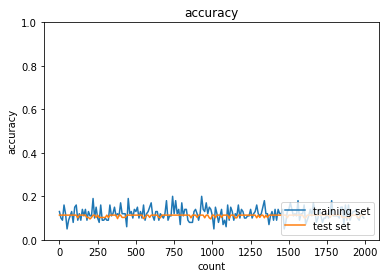

In [22]:
#### vanishing sample
#### sigmoid - gauss
#### 出力の行数を減らすため、以下の行をコメントアウトしました。（コメントアウト前のlogは確認済。）
####        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
####        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01)

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

###        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
###        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()


データ読み込み完了


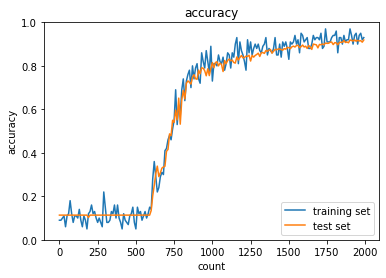

In [4]:
## ReLU - gauss
# データの読み込み
#### 出力の行数を減らすため、以下の行をコメントアウトしました。（コメントアウト前のlogは確認済。）
###        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
###        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std=0.01)

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

###        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
###        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了


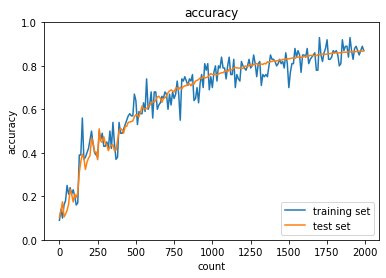

In [5]:
# sigmoid - Xavier
# データの読み込み
#### 出力の行数を減らすため、以下の行をコメントアウトしました。（コメントアウト前のlogは確認済。）
###        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
###        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std='Xavier')

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
###        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
###        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了


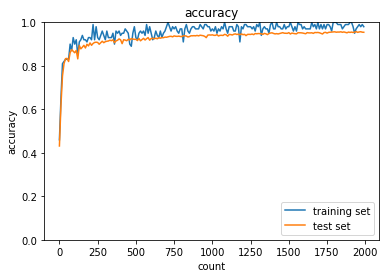

In [6]:
### ReLU - He
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std='He')

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

####  &emsp;&emsp; 1.2.2　実装演習考察 (2_2_2_vanishing_gradient_modified.ipynb)
##### ハンズオン中の試してみようを実施しました。
#####  [try] hidden_size_listの数字を変更してみよう(結果のみ表示）

#####  [try] sigmoid - He と relu - Xavier についても試してみよう(結果のみ表示）

#### 2_3_batch_normalization.ipynb　ハンズオン

In [1]:
####
import sys
## sys.path.append('/content/drive/My Drive/DNN_code')
sys.path.append('D:\stage3_data\DNN_code_colab_lesson_1_2')
sys.path.append('D:\stage3_data\DNN_code_colab_lesson_1_2/lesson_2')
### vanishing gradient modified
### multi layer network class

### importと関数定義
import numpy as np
from common import functions
import matplotlib.pyplot as plt


import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer

# バッチ正則化 layer
class BatchNormalization:
    '''
    gamma: スケール係数
    beta: オフセット
    momentum: 慣性
    running_mean: テスト時に使用する平均
    running_var: テスト時に使用する分散
    '''
    def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None

        self.running_mean = running_mean
        self.running_var = running_var  
        
        # backward時に使用する中間データ
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, train_flg=True):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)
                        
        if train_flg:
            mu = x.mean(axis=0) # 平均
            xc = x - mu # xをセンタリング
            var = np.mean(xc**2, axis=0) # 分散
            std = np.sqrt(var + 10e-7) # スケーリング
            xn = xc / std
            
            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu # 平均値の加重平均
            self.running_var = self.momentum * self.running_var + (1-self.momentum) * var #分散値の加重平均
        else:
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))
            
        out = self.gamma * xn + self.beta 
        
        return out

    def backward(self, dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout, axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc, axis=0)
        dx = dxc - dmu / self.batch_size
        
        self.dgamma = dgamma
        self.dbeta = dbeta

        return dx   

データ読み込み完了


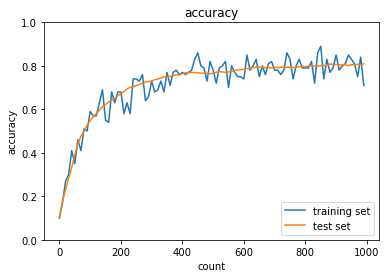

In [3]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")


#### 出力の行数を減らすため、以下の行をコメントアウトしました。（コメントアウト前のlogは確認済。）
####        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
####        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

# batch_normalizationの設定 =======================
use_batchnorm = True
# use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10,
                        activation='sigmoid', weight_init_std='Xavier', use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
####        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
####        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

####  &emsp;&emsp; 1.3　確認テスト
##### 確認テスト①　連鎖律の原理を使い、dz/dxを求めよ。
##### &emsp;&emsp;&emsp;&emsp; $z = t^ 2$
##### &emsp;&emsp;&emsp;&emsp; $t = x + y $
##### &emsp;&emsp;&emsp;&emsp; 解答：
###    &emsp;&emsp; &emsp;&emsp; $ \frac{\partial z }{\partial x} = \frac{\partial z}{\partial t}$   $ \frac{\partial t}{\partial x}$ 
###    &emsp;&emsp; &emsp;&emsp; $ \frac{\partial z }{\partial t} = 2t$ ,  $ \frac{\partial t }{\partial x} = 1 $ 
###    &emsp;&emsp; &emsp;&emsp; $ \frac{\partial z }{\partial x} = 2(x + y )  $ 
##### 確認テスト②　シグモイド関数を微分した時、入力値が0の時に最大値をとる。その値として正しいものを選択肢から選べ。
##### &emsp;&emsp;&emsp;&emsp; 解答：（2）0.25

##### 確認テスト③　重みの初期値に0を設定すると、どのような問題が発生するか。簡潔に説明せよ。
##### &emsp;&emsp;&emsp;&emsp; 解答：初期値が0だと正しい学習が行えない。
##### &emsp;&emsp;&emsp;&emsp; &emsp;&emsp; 全ての重みが均一に更新されるため、多数の重みをもつ意味がなくなる。
##### 確認テスト④　一般的に考えられるバッチ正規化の効果を2点挙げよ。
##### &emsp;&emsp;&emsp;&emsp; 解答：①　中間層の重みが安定する。
##### &emsp;&emsp;&emsp;&emsp; 解答：②　過学習を抑える。

### ２、Section2：学習率最適化手法
####  &emsp;&emsp; 2.1　要点まとめ
#####  &emsp;&emsp; 学習率最適化として代表的な手法を紹介
#####  &emsp;&emsp;  &emsp;&emsp; ・モメンタム
#####  &emsp;&emsp;  &emsp;&emsp; ・AdaGrad
#####  &emsp;&emsp;  &emsp;&emsp; ・RMSProp
#####  &emsp;&emsp;  &emsp;&emsp; ・Adam
####  &emsp;&emsp; 2.1.1　モメンタム
#####  &emsp;&emsp; &emsp;SDGに対して重み更新時に慣性項を追加してスピーディーに学習していく。
#####  &emsp;&emsp; &emsp;前回の重みを用いて学習をしていく。勾配が緩やかだと進みが遅いが、勾配が急だと一気に学習が進んでいく。
#####  &emsp;&emsp; &emsp;&emsp;$ V_t = \mu V_{t-1} - 	\epsilon \nabla E $   &emsp;&emsp;　VはW(重み）と同じ意味。便宜上別の記号で記載
#####  &emsp;&emsp; &emsp;&emsp;$ \mathbf{w}^{(t + 1)} =  \mathbf{w}^{(t)} + V_t  $
#####  &emsp;&emsp; モメンタムのメリット
#####  &emsp;&emsp;&emsp;&emsp;  ・局所的最適解にはならず、大域的最適解となる。
#####  &emsp;&emsp;&emsp;&emsp; ・谷間についてから最も低い位置(最適値)にいくまでの時間が早い。
####  &emsp;&emsp; 2.1.2　AdaGrad
#####  &emsp;&emsp; &emsp;
#####  &emsp;&emsp;&emsp; &emsp;$ h_{0} = \theta $ <--- なんかしらの値(hの初期化)
#####  &emsp;&emsp; &emsp;&emsp;$ h_{t} = h_{t−１} + ( \nabla E)^{2} $  <---- 計算した勾配の２乗を保持
#####  &emsp;&emsp; &emsp;&emsp;$ \mathbf{w}^{t+1} = \mathbf{w}^{t} - \epsilon \frac{1}{\sqrt {h_t}+ \theta} \nabla E $  <--- 現在の重みを適応させた学習率で更新
#####  &emsp;&emsp; AdaGradのメリット
#####  &emsp;&emsp;&emsp;&emsp;  勾配が緩やかだと、最適値に近づきやすい
#####  &emsp;&emsp; AdaGradの過大
#####  &emsp;&emsp;&emsp;&emsp; 鞍点問題が起きやすい。
####  &emsp;&emsp; 2.1.3　RSMprop
#####  &emsp;&emsp; &emsp;Adagradの改良版
#####  &emsp;&emsp;&emsp; &emsp;$ h_{t} = \alpha h_{t−１} + (1 - \alpha) (\nabla E)^2 $ 
#####  &emsp;&emsp; &emsp;&emsp;$ h_{t} = h_{t−１} + ( \nabla E)^{2} $  
#####  &emsp;&emsp; RSMpropのメリット
#####  &emsp;&emsp;&emsp;&emsp;  局所的最適解にはならず、大域的最適解となる。
#####  &emsp;&emsp;&emsp;&emsp; ハイパーパラメータの調整が必要な場合が少ない
####  &emsp;&emsp; 2.1.4　Adam
#####  &emsp;&emsp;&emsp;&emsp;  モメンタムおよびRMSPropのメリットを孕んだアルゴリズム
#####  &emsp;&emsp;&emsp;&emsp;  モメンタムおよびRMSPropのメリットを孕んだアルゴリズム（両方の良いとこどり）

####  &emsp;&emsp; 2.2　実装演習結果と考察　(2_4_optimizer.ipynb)

データ読み込み完了


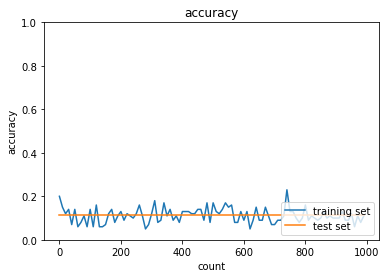

In [2]:
####
import sys
## sys.path.append('/content/drive/My Drive/DNN_code')
sys.path.append('D:\stage3_data\DNN_code_colab_lesson_1_2')
sys.path.append('D:\stage3_data\DNN_code_colab_lesson_1_2/lesson_2')
# optimizer
## SGD
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet


# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================


network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
    
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
##        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
##        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了


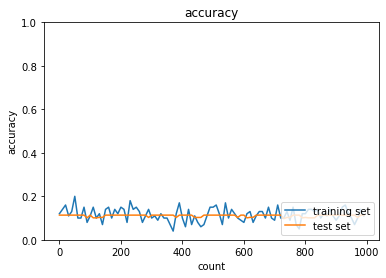

In [4]:
## Momentum

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)


###  1000回学習する。
iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
# 慣性
momentum = 0.9

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        ####### モメンタム計算
        network.params[key] += v[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

##        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
##        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了


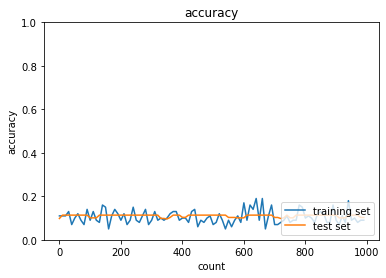

In [3]:
## MomentumをもとにAdaGradを作ってみよう
## θ = 1e-4 とする
# AdaGradを作ってみよう
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
# iters_num = 500 # 処理を短縮

train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

# AdaGradでは不必要
# =============================

momentum = 0.9 

# =============================

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
            
        # 変更しよう  
        ###### hの計算
        # ===========================================
        if i == 0:
            h[key] = np.zeros_like(network.params[key])        
        h[key] = momentum * h[key] - learning_rate * grad[key]
        network.params[key] += h[key]

        # ===========================================
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

##        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
##        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了


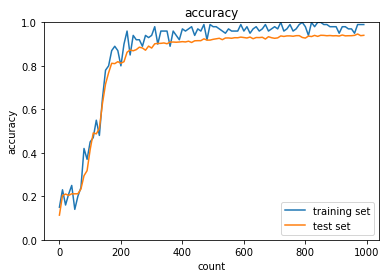

In [7]:
## RSMprop

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
decay_rate = 0.99

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.zeros_like(network.params[key])
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        #### アルファは　decay_rate
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)                
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
##        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
##        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了


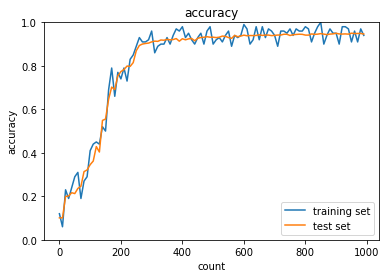

In [4]:
## Adam

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        #### adamの計算
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
##        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
##        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### [try] 学習率を変えてみよう (adamのcodeを使ってトライアル)

データ読み込み完了


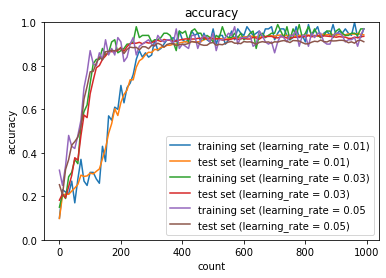

In [14]:
## Adam

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list1 = []
accuracies_train1 = []
accuracies_test1 = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        #### adamの計算
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test1 = network.accuracy(x_test, d_test)
        accuracies_test1.append(accr_test1)        
        accr_train1 = network.accuracy(x_batch, d_batch)
        accuracies_train1.append(accr_train1)
        loss = network.loss(x_batch, d_batch)
        train_loss_list1.append(loss)        
        
##        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
##        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                
# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.03
beta1 = 0.9
beta2 = 0.999

train_loss_list3 = []
accuracies_train3 = []
accuracies_test3 = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        #### adamの計算
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test3 = network.accuracy(x_test, d_test)
        accuracies_test3.append(accr_test3)        
        accr_train3 = network.accuracy(x_batch, d_batch)
        accuracies_train3.append(accr_train3)
        loss = network.loss(x_batch, d_batch)
        train_loss_list3.append(loss)        
        
##        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
##        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.05
beta1 = 0.9
beta2 = 0.999

train_loss_list5 = []
accuracies_train5 = []
accuracies_test5 = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        #### adamの計算
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test5 = network.accuracy(x_test, d_test)
        accuracies_test5.append(accr_test5)        
        accr_train5 = network.accuracy(x_batch, d_batch)
        accuracies_train5.append(accr_train5)
        loss = network.loss(x_batch, d_batch)
        train_loss_list5.append(loss)        
        
##        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
##        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train1, label="training set (learning_rate = 0.01)")
plt.plot(lists, accuracies_test1,  label="test set (learning_rate = 0.01)")
plt.plot(lists, accuracies_train3, label="training set (learning_rate = 0.03)")
plt.plot(lists, accuracies_test3,  label="test set (learning_rate = 0.03)")
plt.plot(lists, accuracies_train5, label="training set (learning_rate = 0.05)")
plt.plot(lists, accuracies_test5,  label="test set (learning_rate = 0.05)")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

####  [try] 活性化関数と重みの初期化方法を変えてみよう　(adamのcodeを使ってトライアル)
#### 初期状態ではsigmoid - gauss
####  activationはReLU、weight_init_stdは別の数値や'Xavier'・'He'に変更可能 'Xavier',

データ読み込み完了


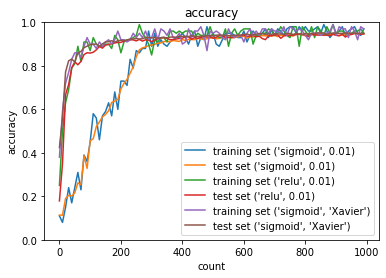

In [16]:
## Adam

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)


## network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std='He')
iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list1 = []
accuracies_train1 = []
accuracies_test1 = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        #### adamの計算
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test1 = network.accuracy(x_test, d_test)
        accuracies_test1.append(accr_test1)        
        accr_train1 = network.accuracy(x_batch, d_batch)
        accuracies_train1.append(accr_train1)
        loss = network.loss(x_batch, d_batch)
        train_loss_list1.append(loss)        
        
##        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
##        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                
# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list3 = []
accuracies_train3 = []
accuracies_test3 = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        #### adamの計算
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test3 = network.accuracy(x_test, d_test)
        accuracies_test3.append(accr_test3)        
        accr_train3 = network.accuracy(x_batch, d_batch)
        accuracies_train3.append(accr_train3)
        loss = network.loss(x_batch, d_batch)
        train_loss_list3.append(loss)        
        
##        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
##        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std='Xavier',
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list5 = []
accuracies_train5 = []
accuracies_test5 = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        #### adamの計算
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test5 = network.accuracy(x_test, d_test)
        accuracies_test5.append(accr_test5)        
        accr_train5 = network.accuracy(x_batch, d_batch)
        accuracies_train5.append(accr_train5)
        loss = network.loss(x_batch, d_batch)
        train_loss_list5.append(loss)        
        
##        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
##        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train1, label="training set ('sigmoid', 0.01)")
plt.plot(lists, accuracies_test1,  label="test set ('sigmoid', 0.01)")
plt.plot(lists, accuracies_train3, label="training set ('relu', 0.01)")
plt.plot(lists, accuracies_test3,  label="test set ('relu', 0.01)")
plt.plot(lists, accuracies_train5, label="training set ('sigmoid', 'Xavier')")
plt.plot(lists, accuracies_test5,  label="test set ('sigmoid', 'Xavier')")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### [try] バッチ正規化をしてみよう (adamのcodeを使ってトライアル)
### use_batchnormをTrueにしよう

データ読み込み完了


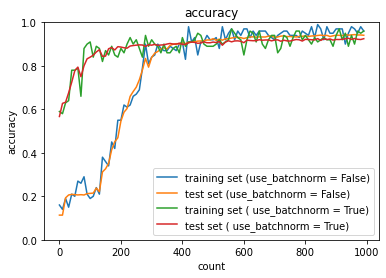

In [19]:
## Adam

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list1 = []
accuracies_train1 = []
accuracies_test1 = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        #### adamの計算
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test1 = network.accuracy(x_test, d_test)
        accuracies_test1.append(accr_test1)        
        accr_train1 = network.accuracy(x_batch, d_batch)
        accuracies_train1.append(accr_train1)
        loss = network.loss(x_batch, d_batch)
        train_loss_list1.append(loss)        
        
##        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
##        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                
# batch_normalizationの設定 ================================
use_batchnorm = True
#use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list3 = []
accuracies_train3 = []
accuracies_test3 = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        #### adamの計算
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test3 = network.accuracy(x_test, d_test)
        accuracies_test3.append(accr_test3)        
        accr_train3 = network.accuracy(x_batch, d_batch)
        accuracies_train3.append(accr_train3)
        loss = network.loss(x_batch, d_batch)
        train_loss_list3.append(loss)        
        
##        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
##        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                



lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train1, label="training set (use_batchnorm = False)")
plt.plot(lists, accuracies_test1,  label="test set (use_batchnorm = False)")
plt.plot(lists, accuracies_train3, label="training set ( use_batchnorm = True)")
plt.plot(lists, accuracies_test3,  label="test set ( use_batchnorm = True)")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### [try] バッチ正規化をしてみよう (AdaGradのcodeを使ってトライアル)
### use_batchnormをTrueにしよう

データ読み込み完了


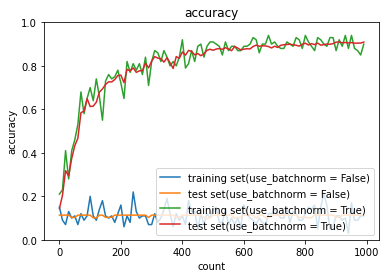

In [21]:
## MomentumをもとにAdaGradを作ってみよう
## θ = 1e-4 とする
# AdaGradを作ってみよう
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
#use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
# iters_num = 500 # 処理を短縮

train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

# AdaGradでは不必要
# =============================

momentum = 0.9 

# =============================

train_loss_list2 = []
accuracies_train2 = []
accuracies_test2 = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
            
        # 変更しよう  
        ###### hの計算
        # ===========================================
        if i == 0:
            h[key] = np.zeros_like(network.params[key])        
        h[key] = momentum * h[key] - learning_rate * grad[key]
        network.params[key] += h[key]

        # ===========================================
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list2.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test2 = network.accuracy(x_test, d_test)
        accuracies_test2.append(accr_test2)        
        accr_train2 = network.accuracy(x_batch, d_batch)
        accuracies_train2.append(accr_train2)


# batch_normalizationの設定 ================================
use_batchnorm = True
# use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
# iters_num = 500 # 処理を短縮

train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

# AdaGradでは不必要
# =============================

momentum = 0.9 

# =============================

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
            
        # 変更しよう  
        ###### hの計算
        # ===========================================
        if i == 0:
            h[key] = np.zeros_like(network.params[key])        
        h[key] = momentum * h[key] - learning_rate * grad[key]
        network.params[key] += h[key]

        # ===========================================
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

##        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
##        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train2, label="training set(use_batchnorm = False)")
plt.plot(lists, accuracies_test2,  label="test set(use_batchnorm = False)")
plt.plot(lists, accuracies_train, label="training set(use_batchnorm = True)")
plt.plot(lists, accuracies_test,  label="test set(use_batchnorm = True)")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

####  &emsp;&emsp; 2.3　確認テスト
##### &emsp;&emsp; 　確認テスト① モメンタム・AdaGrad・RMSPropの特徴をそれぞれ簡潔に説明せよ。
##### &emsp;&emsp; 　解答：
|  | 特徴 | 
| :---: | :--- |
| モメンタム | ・重み更新時に慣性項を追加してスピーディーに学習 <br> ・ 勾配が緩やかだと進みが遅いが、勾配が急だと一気に学習が進んでいく   |
| Adagrade | ・鞍点問題が起きやすい　<br> ・勾配が緩やかだと、最適値に近づきやすい |
| RMSP | ・ Adagradの改良版 <br> ・局所的最適解にはならず、大域的最適解となる <br>  ・ ハイパーパラメータの調整が必要な場合が少ない |

###  ３、Section3：過学習
####  &emsp;&emsp; 3.1　要点まとめ
#####  学習データと検証データと分割して処理した場合、学習データに対して過剰にFittingして誤差が順調に減少するのに対して
#####  検証データでは上手く誤差が減少していかない現象。
#####  原因：パラメータ数が多い
#####  &emsp;&emsp; ノード数が多い
#### &emsp;&emsp;総じてニューラルネットワークの自由度が高い（入力値に対して）
####  &emsp;&emsp; 3.1.1 対策：
#####  &emsp;&emsp; &emsp;過学習の対策として以下の方法がある。
#####  &emsp;&emsp; &emsp;&emsp;&emsp;・正規化(L1 ,L2)
#####  &emsp;&emsp; &emsp;&emsp;&emsp;・Drop Out
####  &emsp;&emsp; 3.1.2 正規化(L1 ,L2)
#####  &emsp;&emsp; &emsp;&emsp;&emsp;過学習が発生するのはネットワークの自由度が高いので自由度を制約することが目的
#####  &emsp;&emsp; &emsp;&emsp;&emsp;正則化とは、ネットワークの自由度を制約すること
#####  &emsp;&emsp; &emsp;&emsp;過学習が起きているときにNN内では何が起きているか。
#####  &emsp;&emsp; &emsp;&emsp;&emsp;重みが（過大に）大きいところが発生している。一部のデータに過剰に反応している。
#####  &emsp;&emsp; &emsp;&emsp;&emsp;正規化：
#####  &emsp;&emsp; &emsp;&emsp;&emsp;L1正規化　Lasso正規化　, L2正規化　Ridge正規化
#####  &emsp;&emsp; &emsp;&emsp;&emsp;Pノルム(距離）
#####  &emsp;&emsp; &emsp;&emsp;&emsp; &emsp;&emsp; $ \|{\bf x} \|_p  = (\ |x_1|^p + |x_2|^p + \cdots + |x_n|^p )^{\frac{1}{p}} $
#####  &emsp;&emsp; &emsp;&emsp;&emsp; &emsp;P=1のとき $  |x| + |y| $　P=2のとき $  \sqrt{|x|^2 + |y|^2} $
####  &emsp;&emsp; 3.1.3 Drop out
#####  &emsp;&emsp; &emsp;&emsp;&emsp;学習のたびにニューラルネットワークの一部を切断し学習していく。
#####  &emsp;&emsp; &emsp;&emsp;&emsp;違うデータで学習しているように見える。そのためデータ連絡に
#####  &emsp;&emsp; &emsp;&emsp;&emsp;バリエーションが生まれる。

####  &emsp;&emsp; 3.2　実装演習結果と考察

データ読み込み完了


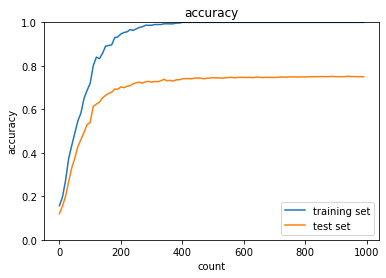

In [1]:
####
import sys
## sys.path.append('/content/drive/My Drive/DNN_code')
sys.path.append('D:\stage3_data\DNN_code_colab_lesson_1_2')
sys.path.append('D:\stage3_data\DNN_code_colab_lesson_1_2/lesson_2')
### overfiting
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

 ###       print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
 ###       print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了


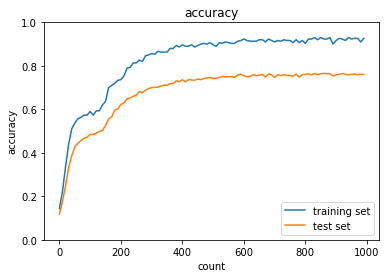

In [2]:
### weight decay
### L2
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
### weight_decay_lambda = 0.1
weight_decay_lambda = 0.1
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
 ###       print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
 ###       print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()


データ読み込み完了


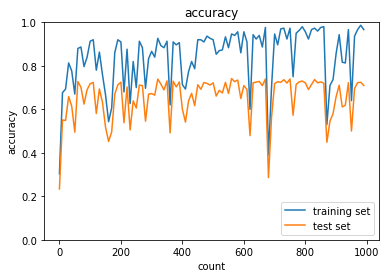

In [11]:
### L1
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
### weight_decay_lambda = 0.005
weight_decay_lambda = 0.005
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
###        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
###        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### [try] weigth_decay_lambdaの値を変更して正則化の強さを確認しよう

データ読み込み完了


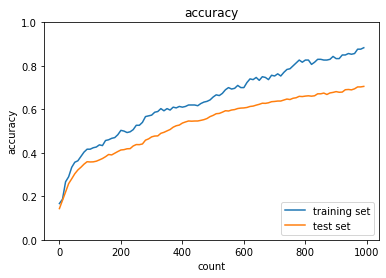

In [28]:
### Dropout
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask
    
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

###        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
###        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()    

### [try] dropout_ratioの値を変更してみよう

### [try] optimizerとdropout_ratioの値を変更してみよう

データ読み込み完了


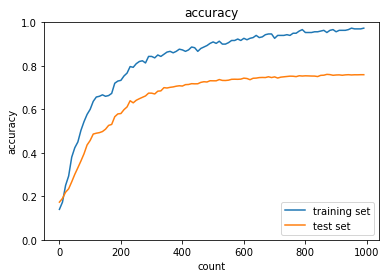

In [6]:
### Dropout + L1

from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
###        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
###        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

####  &emsp;&emsp; 3.3　確認テスト
##### &emsp;&emsp; 　確認テスト①　下図について、L1正則化を表しているグラフはどちらか答えよ。
##### &emsp;&emsp; 　解答：右図 (左図はL2正則化した場合の図）

###  ４、Section4：畳み込みニューラルネットワークの概念
####  &emsp;&emsp; 4.1　要点まとめ
####  &emsp;&emsp;&emsp; CNNでは、次元のつながりがあるデータが扱える
| | １次元 | ２次元 | ３次元|
| :---: | :---: | :---: | :---: |
| 単一チャネル | 音声 | フーリエ―変換した音声 | CTスキャンの画像 |
| 複数チャネル | アニメのスケルトン| カラー画像| 動画 |

####  &emsp;&emsp; 4.1.1　CNNの構造
####  &emsp;&emsp;&emsp; 層の種類には以下の５種類が存在している。
####  &emsp;&emsp;&emsp;&emsp; 入力層：データの入力を行う層
####  &emsp;&emsp;&emsp;&emsp; 畳み込み層：３次元の空間情報学習
####  &emsp;&emsp;&emsp;&emsp; プーリング層：重みを持たずサイズ内の値の平均(Ave.)またはMax値を取得
####  &emsp;&emsp;&emsp;&emsp; 全結合層
####  &emsp;&emsp;&emsp;&emsp; 出力層


####  &emsp;&emsp; 4.1.2　用語
#####  &emsp;&emsp;&emsp;パディング　：畳み込み処理を繰り返し行っていくと画像サイズが小さくなってしまうので、
#####  &emsp;&emsp;&emsp; &emsp;&emsp;  &emsp;&emsp; &emsp;サイズが小さくならないように、画像周辺に一マスずつデータを追加すること。
#####  &emsp;&emsp;&emsp; &emsp;&emsp;  &emsp;&emsp; &emsp;固定値の場合と、隣接する値をcopyする場合がある。
#####  &emsp;&emsp;&emsp;ストライド　：フィルターの動く量
#####  &emsp;&emsp;&emsp; &emsp;&emsp;&emsp;ストライド１：フィルターが一マスずつ動く
#####  &emsp;&emsp;&emsp; &emsp;&emsp;&emsp;ストライド１：フィルターが二マスずつ動く
#####  &emsp;&emsp;&emsp;チャネル　　：フィルターの数
####  &emsp;&emsp; 4.1.3 高速処理
#####  &emsp;&emsp;&emsp;処理を高速化するために,Imgの行列を畳み込みの行列計算がしやすいように配列を変更する。
#####  &emsp;&emsp;&emsp;　詳細はハンズオンを参照。

####  &emsp;&emsp; 4.2　実装演習結果と考察 (2_6_simple_convolution_network.ipynb)

In [5]:
import sys
## sys.path.append('/content/drive/My Drive/DNN_code')
sys.path.append('D:\stage3_data\DNN_code_colab_lesson_1_2')

### vanishing gradient modified
### multi layer network class

### importと関数定義
import numpy as np
from common import functions
import matplotlib.pyplot as plt
#### nsimple convolution network
#### image to column
import pickle
import numpy as np
from collections import OrderedDict
from common import layers
from common import optimizer
from data.mnist import load_mnist
import matplotlib.pyplot as plt

# 画像データを２次元配列に変換
'''
input_data: 入力値
filter_h: フィルターの高さ
filter_w: フィルターの横幅
stride: ストライド
pad: パディング
'''
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    # N: number, C: channel, H: height, W: width
    N, C, H, W = input_data.shape
    out_h = (H + 2 * pad - filter_h)//stride + 1
    out_w = (W + 2 * pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]
    
    col = col.transpose(0, 4, 5, 1, 2, 3) # (N, C, filter_h, filter_w, out_h, out_w) -> (N, filter_w, out_h, out_w, C, filter_h)    
    
    col = col.reshape(N * out_h * out_w, -1)
    return col


### [try] col2imの処理を確認しよう
#### ・関数内でtransposeの処理をしている行をコメントアウトして下のコードを実行してみよう
#### ・input_dataの各次元のサイズやフィルターサイズ・ストライド・パディングを変えてみよう

In [14]:
# im2colの処理確認
input_data = np.random.rand(2, 1, 4, 4)*100//1 # number, channel, height, widthを表す
print('========== input_data ===========\n', input_data)
print('==============================')
filter_h = 3
filter_w = 3
stride = 1
pad = 0
col = im2col(input_data, filter_h=filter_h, filter_w=filter_w, stride=stride, pad=pad)
print('============= col ==============\n', col)
print('==============================')


========== input_data ===========
 [[[[22. 28. 54. 59.]
   [51. 57. 90. 27.]
   [63. 15. 82. 57.]
   [22. 20. 47.  2.]]]


 [[[93.  7. 97. 75.]
   [95. 80. 96. 67.]
   [88. 23. 38. 77.]
   [89. 20. 99. 91.]]]]
============= col ==============
 [[22. 28. 54. 51. 57. 90. 63. 15. 82.]
 [28. 54. 59. 57. 90. 27. 15. 82. 57.]
 [51. 57. 90. 63. 15. 82. 22. 20. 47.]
 [57. 90. 27. 15. 82. 57. 20. 47.  2.]
 [93.  7. 97. 95. 80. 96. 88. 23. 38.]
 [ 7. 97. 75. 80. 96. 67. 23. 38. 77.]
 [95. 80. 96. 88. 23. 38. 89. 20. 99.]
 [80. 96. 67. 23. 38. 77. 20. 99. 91.]]


In [10]:
# im2colの処理確認
input_data = np.random.rand(2, 1, 4, 4)*100//1 # number, channel, height, widthを表す
print('========== input_data ===========\n', input_data)
print('==============================')
filter_h = 2
filter_w = 2
stride = 1
pad = 0
col = im2col(input_data, filter_h=filter_h, filter_w=filter_w, stride=stride, pad=pad)
print('============= col ==============\n', col)
print('==============================')


========== input_data ===========
 [[[[31. 95. 20. 32.]
   [ 5. 80. 20. 21.]
   [98. 25. 26. 63.]
   [72. 47. 71.  6.]]]


 [[[77.  6. 40. 26.]
   [67. 67. 16. 91.]
   [37. 77. 62. 26.]
   [69.  1. 34. 77.]]]]
============= col ==============
 [[31. 95.  5. 80.]
 [95. 20. 80. 20.]
 [20. 32. 20. 21.]
 [ 5. 80. 98. 25.]
 [80. 20. 25. 26.]
 [20. 21. 26. 63.]
 [98. 25. 72. 47.]
 [25. 26. 47. 71.]
 [26. 63. 71.  6.]
 [77.  6. 67. 67.]
 [ 6. 40. 67. 16.]
 [40. 26. 16. 91.]
 [67. 67. 37. 77.]
 [67. 16. 77. 62.]
 [16. 91. 62. 26.]
 [37. 77. 69.  1.]
 [77. 62.  1. 34.]
 [62. 26. 34. 77.]]


### [try] col2imの処理を確認しよう
### ・im2colの確認で出力したcolをimageに変換して確認しよう

In [15]:
#### column to image

# ２次元配列を画像データに変換
def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    # N: number, C: channel, H: height, W: width
    N, C, H, W = input_shape
    # 切り捨て除算    
    out_h = (H + 2 * pad - filter_h)//stride + 1
    out_w = (W + 2 * pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2) # (N, filter_h, filter_w, out_h, out_w, C)

    img = np.zeros((N, C, H + 2 * pad + stride - 1, W + 2 * pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]

In [16]:
# ここにcol2imでの処理を書こう
img = col2im(col, input_shape=input_data.shape, filter_h=filter_h, filter_w=filter_w, stride=stride, pad=pad)
print(img)

[[[[ 22.  56. 108.  59.]
   [102. 228. 360.  54.]
   [126.  60. 328. 114.]
   [ 22.  40.  94.   2.]]]


 [[[ 93.  14. 194.  75.]
   [190. 320. 384. 134.]
   [176.  92. 152. 154.]
   [ 89.  40. 198.  91.]]]]


データ読み込み完了


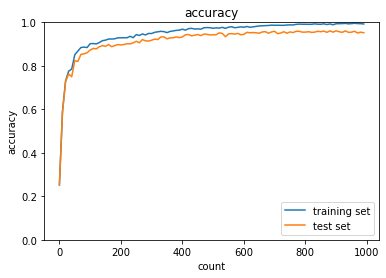

In [17]:
### convolution class
class Convolution:
    # W: フィルター, b: バイアス
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
        # 中間データ（backward時に使用）
        self.x = None   
        self.col = None
        self.col_W = None
        
        # フィルター・バイアスパラメータの勾配
        self.dW = None
        self.db = None

    def forward(self, x):
        # FN: filter_number, C: channel, FH: filter_height, FW: filter_width
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        # 出力値のheight, width
        out_h = 1 + int((H + 2 * self.pad - FH) / self.stride)
        out_w = 1 + int((W + 2 * self.pad - FW) / self.stride)
        
        # xを行列に変換
        col = im2col(x, FH, FW, self.stride, self.pad)
        # フィルターをxに合わせた行列に変換
        col_W = self.W.reshape(FN, -1).T

        out = np.dot(col, col_W) + self.b
        # 計算のために変えた形式を戻す
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0, 2, 3, 1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        # dcolを画像データに変換
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx

### pooling class
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)
        
        # xを行列に変換
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        # プーリングのサイズに合わせてリサイズ
        col = col.reshape(-1, self.pool_h*self.pool_w)
        
        #maxプーリング
        arg_max = np.argmax(col, axis=1)
        out = np.max(col, axis=1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx

### sinple convolution network class
class SimpleConvNet:
    # conv - relu - pool - affine - relu - affine - softmax
    def __init__(self, input_dim=(1, 28, 28), conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']        
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2 * filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size / 2) * (conv_output_size / 2))

        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # レイヤの生成  <----  畳み込みとプーリング処理
        self.layers = OrderedDict()
        self.layers['Conv1'] = layers.Convolution(self.params['W1'], self.params['b1'], conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = layers.Relu()
        self.layers['Pool1'] = layers.Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = layers.Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = layers.Relu()
        self.layers['Affine2'] = layers.Affine(self.params['W3'], self.params['b3'])

        self.last_layer = layers.SoftmaxWithLoss()

    def predict(self, x):
        for key in self.layers.keys():
            x = self.layers[key].forward(x)
        return x
        
    def loss(self, x, d):
        y = self.predict(x)
        return self.last_layer.forward(y, d)

    def accuracy(self, x, d, batch_size=100):
        if d.ndim != 1 : d = np.argmax(d, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            td = d[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == td) 
        
        return acc / x.shape[0]

    def gradient(self, x, d):
        # forward
        self.loss(x, d)
        
        # backward
        dout = 1
        dout = self.last_layer.backward(dout)
        layers = list(self.layers.values())
        
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grad = {}
        grad['W1'], grad['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grad['W2'], grad['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grad['W3'], grad['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grad
    
from common import optimizer

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(flatten=False)

print("データ読み込み完了")

# 処理に時間のかかる場合はデータを削減 
x_train, d_train = x_train[:5000], d_train[:5000]
x_test, d_test = x_test[:1000], d_test[:1000]


network = SimpleConvNet(input_dim=(1,28,28), conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10



for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]
    
    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)

    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
###        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
###        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()


####  &emsp;&emsp; 4.3　確認テスト
##### サイズ6×6の入力画像を、サイズ2×2のフィルタで畳み込んだ時の出力画像のサイズを答えよ。
##### なおストライドとパディングは1とする。
##### 解答： 7 x 7
##### 計算式：
#### &emsp;&emsp;  Oh = (画像の高さ + 2 x パディング数　- フィルターの高さ) / ストライド)+1
#### &emsp;&emsp;  Ow = (画像の幅 + 2 x パディング数　- フィルターの幅) / ストライド)+1

###  ５、Section5：最新のCNN
####  &emsp;&emsp; 5.1　要点まとめ

### &emsp;&emsp;　過学習を防ぐ施策
#### &emsp;&emsp; &emsp;　サイズ4096の全結合層の出力にDrop Outを使用

### LeNetとAlexNetのCNN構造の比較

####  中間層から全結合層への変換

####  &emsp;&emsp; 5.2　実装演習結果と考察 (2_7_double_comvolution_network.ipynb)

In [1]:
import sys
## sys.path.append('/content/drive/My Drive/DNN_code')
sys.path.append('D:\stage3_data\DNN_code_colab_lesson_1_2')
### double_comvolution_network
import pickle
import numpy as np
from collections import OrderedDict
from common import layers
from common import optimizer
from data.mnist import load_mnist
import matplotlib.pyplot as plt

class DoubleConvNet:
    # conv - relu - pool - conv - relu - pool - affine - relu - affine - softmax
    def __init__(self, input_dim=(1, 28, 28),
                 conv_param_1={'filter_num':10, 'filter_size':7, 'pad':1, 'stride':1},
                 conv_param_2={'filter_num':20, 'filter_size':3, 'pad':1, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        conv_output_size_1 = (input_dim[1] - conv_param_1['filter_size'] + 2 * conv_param_1['pad']) / conv_param_1['stride'] + 1
        conv_output_size_2 = (conv_output_size_1 / 2 - conv_param_2['filter_size'] + 2 * conv_param_2['pad']) / conv_param_2['stride'] + 1        
        pool_output_size = int(conv_param_2['filter_num'] * (conv_output_size_2 / 2) * (conv_output_size_2 / 2))        
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(conv_param_1['filter_num'], input_dim[0], conv_param_1['filter_size'], conv_param_1['filter_size'])
        self.params['b1'] = np.zeros(conv_param_1['filter_num'])
        self.params['W2'] = weight_init_std * np.random.randn(conv_param_2['filter_num'], conv_param_1['filter_num'], conv_param_2['filter_size'], conv_param_2['filter_size'])
        self.params['b2'] = np.zeros(conv_param_2['filter_num'])
        self.params['W3'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
        self.params['b3'] = np.zeros(hidden_size)
        self.params['W4'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b4'] = np.zeros(output_size)
        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Conv1'] = layers.Convolution(self.params['W1'], self.params['b1'], conv_param_1['stride'], conv_param_1['pad'])
        self.layers['Relu1'] = layers.Relu()
        self.layers['Pool1'] = layers.Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Conv2'] = layers.Convolution(self.params['W2'], self.params['b2'], conv_param_2['stride'], conv_param_2['pad'])
        self.layers['Relu2'] = layers.Relu()
        self.layers['Pool2'] = layers.Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = layers.Affine(self.params['W3'], self.params['b3'])
        self.layers['Relu3'] = layers.Relu()
        self.layers['Affine2'] = layers.Affine(self.params['W4'], self.params['b4'])
        self.last_layer = layers.SoftmaxWithLoss()

    def predict(self, x):
        for key in self.layers.keys():
            x = self.layers[key].forward(x)
        return x
        
    def loss(self, x, d):
        y = self.predict(x)
        return self.last_layer.forward(y, d)

    def accuracy(self, x, d, batch_size=100):
        if d.ndim != 1 : d = np.argmax(d, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            td = d[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == td) 
        
        return acc / x.shape[0]

    def gradient(self, x, d):
        # forward
        self.loss(x, d)
        
        # backward
        dout = 1
        dout = self.last_layer.backward(dout)
        layers = list(self.layers.values())
        
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grad = {}
        grad['W1'], grad['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grad['W2'], grad['b2'] = self.layers['Conv2'].dW, self.layers['Conv2'].db        
        grad['W3'], grad['b3'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grad['W4'], grad['b4'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grad
    

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.0964
                : 10. 正答率(テスト) = 0.085
Generation: 20. 正答率(トレーニング) = 0.1548
                : 20. 正答率(テスト) = 0.154
Generation: 30. 正答率(トレーニング) = 0.412
                : 30. 正答率(テスト) = 0.382
Generation: 40. 正答率(トレーニング) = 0.5974
                : 40. 正答率(テスト) = 0.554
Generation: 50. 正答率(トレーニング) = 0.668
                : 50. 正答率(テスト) = 0.624
Generation: 60. 正答率(トレーニング) = 0.7168
                : 60. 正答率(テスト) = 0.671
Generation: 70. 正答率(トレーニング) = 0.7416
                : 70. 正答率(テスト) = 0.702
Generation: 80. 正答率(トレーニング) = 0.7858
                : 80. 正答率(テスト) = 0.746
Generation: 90. 正答率(トレーニング) = 0.7676
                : 90. 正答率(テスト) = 0.725
Generation: 100. 正答率(トレーニング) = 0.8166
                : 100. 正答率(テスト) = 0.786


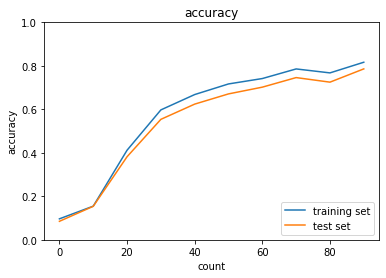

In [2]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(flatten=False)

print("データ読み込み完了")
# 処理に時間のかかる場合はデータを削減 
x_train, d_train = x_train[:5000], d_train[:5000]
x_test, d_test = x_test[:1000], d_test[:1000]


network = DoubleConvNet(input_dim=(1,28,28), 
                          conv_param_1={'filter_num':10, 'filter_size':7, 'pad':1, 'stride':1},
                          conv_param_2={'filter_num':20, 'filter_size':3, 'pad':1, 'stride':1},
                          hidden_size=100, output_size=10, weight_init_std=0.01)

optimizer = optimizer.Adam()

# 時間がかかるため100に設定
iters_num = 100
# iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10



for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]
    
    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)

    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

####  &emsp;&emsp; 5.3　確認テスト
#####  確認テストは存在していません。
